In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.signal import hilbert

# Criando uma série temporal estacionária

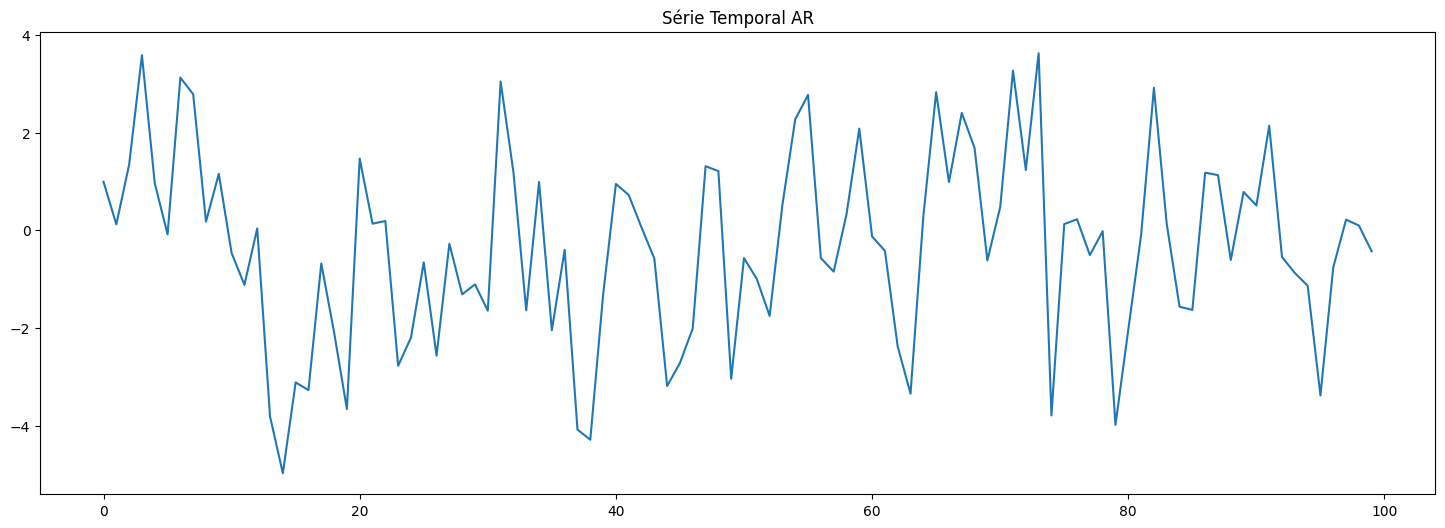

In [23]:
# Parâmetros do modelo AR
phi = np.array([0.5, -0.2])  # Coeficientes AR

# Gerar dados da série temporal AR
np.random.seed(42)
ar_data = sm.tsa.arma_generate_sample(ar=phi, ma=[1], nsample=100)

# Plotar a série temporal
plt.figure(figsize=(18,6))
plt.title("Série Temporal AR")
plt.plot(ar_data)
plt.show()

In [28]:
def adf_test(timeseries):
    print('H0: A série temporal é estacionária (caso valor-p < 0.05)')
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)

In [29]:
adf_test(ar_data) #série estacionária, p-value < 0.05

H0: A série temporal é estacionária (caso valor-p < 0.05)
Results of Dickey-Fuller Test:
Test Statistic                -6.733168e+00
p-value                        3.257024e-09
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


In [26]:
def kpss_test(x, h0_type='c'):
  indices = ['Estatística do teste', 'valor-p', '# de Lags']
  kpss_test = kpss(x, regression=h0_type, nlags="legacy")
  results = pd.Series(kpss_test[0:3], index=indices)
  print('H0: A série temporal é estacionária (caso valor-p > 0.05)')
  for key, value in kpss_test[3].items():
    results[f'Critical Value ({key})'] = value
  
  return results

In [27]:
kpss_test(ar_data) #série estacionária se p-value > 0.05

H0: A série temporal é estacionária (caso valor-p > 0.05)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7764\699921468.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(x, regression=h0_type, nlags="legacy")


Estatística do teste      0.135805
valor-p                   0.100000
# de Lags                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

# Análise de Fourier
https://towardsdatascience.com/fourier-transform-for-time-series-292eb887b101

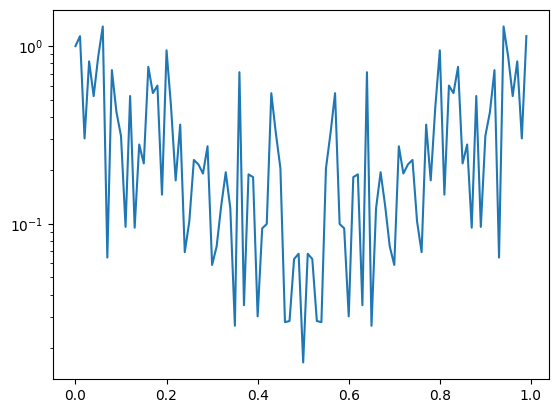

In [32]:
# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(ar_data))

# get the list of frequencies
num=np.size(ar_data)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)

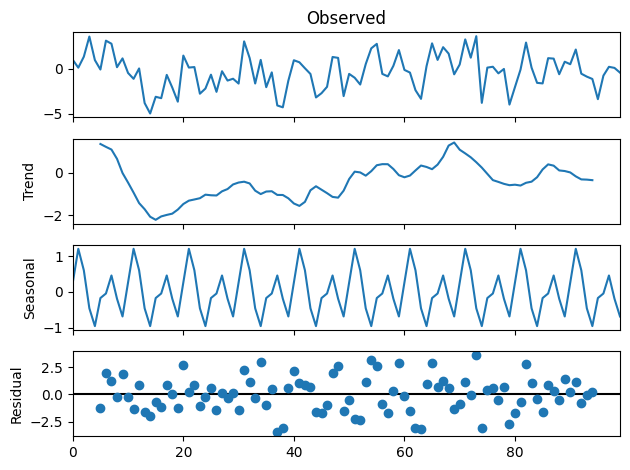

In [42]:
res = sm.tsa.seasonal_decompose(ar_data, model='additive', period=10)
res.plot()
plt.show()

## Plot da fase da tendência

In [84]:
sinal_saz = res.seasonal

z = np.fft.fft(sinal_saz, axis=-1)
#z[0] = 0
#z[50:100] = np.zeros(50)

w = np.fft.ifft(z) / np.size(sinal_saz)

amp = 2 * np.abs(w)

fase = np.arctan2(np.imag(w), np.real(w))
#unwrapped_phase = np.unwrap(fase)
unwrapped_phase = fase.cumsum()

sinal_hilbert = hilbert(sinal_saz)
fase_hilbert = np.arctan2(np.imag(sinal_hilbert), np.real(sinal_hilbert))
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

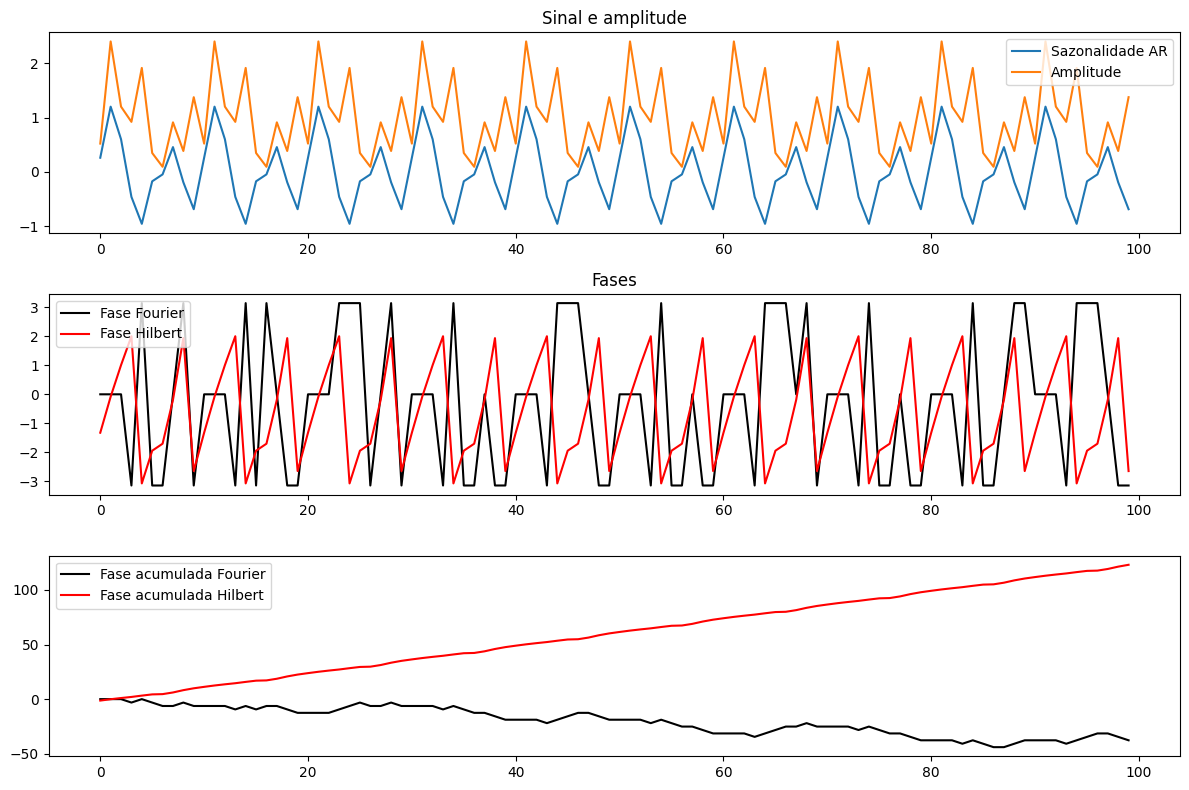

In [85]:
fig, ax = plt.subplots(3,1, figsize=(12,8))

ax[0].plot(sinal_saz, label='Sazonalidade AR')
#ax[0].plot(sinal_hilbert, label='Sinal Hilbert', color='red')
ax[0].plot(100*amp, label='Amplitude')
ax[0].legend(loc='upper right')
ax[0].set_title('Sinal e amplitude')

ax[1].plot(fase, color='black', label='Fase Fourier')
ax[1].plot(fase_hilbert, color='red', label='Fase Hilbert')
ax[1].set_title('Fases')
ax[1].legend()

ax[2].plot(unwrapped_phase, color='black', label='Fase acumulada Fourier')
ax[2].plot(unwrapped_phase_hilbert, color='red', label='Fase acumulada Hilbert')
ax[2].legend()

plt.tight_layout()

In [83]:
sinal_hilbert

array([ 0.2606836 -1.03038587j,  1.20212717-0.09840893j,
        0.6012342 +0.94892468j, -0.46093975+1.00437538j,
       -0.95787801-0.06829834j, -0.1739665 -0.44544267j,
       -0.04683167-0.35502823j,  0.45651195-0.08738847j,
       -0.19252386+0.50478776j, -0.68841712-0.37313531j,
        0.2606836 -1.03038587j,  1.20212717-0.09840893j,
        0.6012342 +0.94892468j, -0.46093975+1.00437538j,
       -0.95787801-0.06829834j, -0.1739665 -0.44544267j,
       -0.04683167-0.35502823j,  0.45651195-0.08738847j,
       -0.19252386+0.50478776j, -0.68841712-0.37313531j,
        0.2606836 -1.03038587j,  1.20212717-0.09840893j,
        0.6012342 +0.94892468j, -0.46093975+1.00437538j,
       -0.95787801-0.06829834j, -0.1739665 -0.44544267j,
       -0.04683167-0.35502823j,  0.45651195-0.08738847j,
       -0.19252386+0.50478776j, -0.68841712-0.37313531j,
        0.2606836 -1.03038587j,  1.20212717-0.09840893j,
        0.6012342 +0.94892468j, -0.46093975+1.00437538j,
       -0.95787801-0.06829834j,